In [3]:
import torch 
import torchvision 
import torchvision.transforms as T
from autoencoder_examiner import AutoencoderExaminer
import numpy as np 
CIFAR10_STATS = {
    'mean' : [0.4914, 0.4822, 0.4465],
    'std' : [0.2023, 0.1994, 0.2010]
}


def sample(autoencoder, num_samples=1, sigma=1.0):
    x = torch.randn(num_samples, *autoencoder.bottleneck_size) 
    x = x * sigma
    return x 

transform = T.Compose([
                T.ToTensor(), 
                T.Normalize(CIFAR10_STATS['mean'], CIFAR10_STATS['std'])
            ])
# ae = torch.load('results/ae/(05_23)_12:19:09/model_best.pt', map_location='cpu')
p1 = 'results/ae/script_model.pt'
p3 = 'results/densenet/script_model.pt'  # acc 87%

root='untracked'
model = torch.load(p1, map_location='cpu')
classifier = torch.load(p3,  map_location='cpu')
valid_dataset = torchvision.datasets.CIFAR10(root=root, train=False, transform=transform, download=True)

Files already downloaded and verified


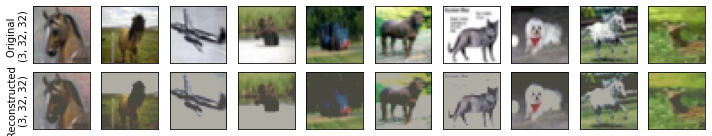

<Figure size 432x288 with 0 Axes>

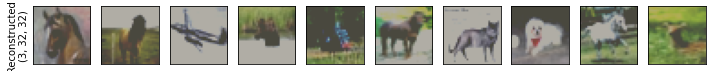

<Figure size 432x288 with 0 Axes>

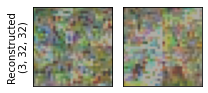

<Figure size 432x288 with 0 Axes>

In [4]:
indices = [np.random.randint(len(valid_dataset)) for i in range(10)]
input= torch.stack([valid_dataset[i][0] for i in indices])

# --- Test Img -> Recon ---
x_hat, loss_dict, info = AutoencoderExaminer.reconstruct_input(model, input)    
AutoencoderExaminer.save_original_and_reconstruction(x_hat,
                                                     input,
                                                     CIFAR10_STATS['mean'],
                                                    CIFAR10_STATS['std'], 
                                                    f'results/{model.__class__.__name__}_recon.pdf' , figsize=(10, 2))

# --- Test Latent -> Recon ---
z = info['bottleneck']
grad = AutoencoderExaminer.get_classifier_latent_direction(model, classifier, z, y=0)
# for i in range(100):
z += grad  * 10
    
x_hat = AutoencoderExaminer.reconstruct_latent(model, z)
AutoencoderExaminer.save_reconstruction(x_hat, CIFAR10_STATS['mean'], CIFAR10_STATS['std'], f'results/{model.__class__.__name__}_recon.pdf', figsize=(10,2))

# --- Test (Random) Latent -> Recon ---
z = sample(model, num_samples=2)
grad = AutoencoderExaminer.get_classifier_latent_direction(model, classifier, z, y=0)
x_hat = AutoencoderExaminer.reconstruct_latent(model, z)
AutoencoderExaminer.save_reconstruction(x_hat, CIFAR10_STATS['mean'], CIFAR10_STATS['std'], f'results/{model.__class__.__name__}_recon.pdf', figsize=(3,2))
# ----------------
